# EDA

## Import libraries

In [109]:
import pandas as pd 
import numpy as np
import os
from joblib import dump
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

## Read all the csv for the analysis 

In [110]:
df_2015 = pd.read_csv('../data/2015.csv')
df_2016 = pd.read_csv('../data/2016.csv')
df_2017 = pd.read_csv('../data/2017.csv')
df_2018 = pd.read_csv('../data/2018.csv')
df_2019 = pd.read_csv('../data/2019.csv')

In [111]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [112]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [113]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [114]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [115]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


From the description of each dataframe, we can already see that there are some columns that do not have the same name, so we will probably need to normalize the names of these columns.

In [116]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [117]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [118]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [119]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [120]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


With the information and the name of each column of each dataset, we now know 100% which columns we need to normalize and make a decision about them, we can also see that none of the dataframes has a year column, so we can make the decision to add it.

In [121]:
print("2015: \n", df_2015.isnull().sum())
print("2016: \n", df_2016.isnull().sum())
print("2017: \n", df_2017.isnull().sum())
print("2018: \n", df_2018.isnull().sum())
print("2019: \n", df_2019.isnull().sum())

2015: 
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
2016: 
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
2017: 
 Country                          0
Happiness.Rank                   0
Happi

Here we notice that there is only one null value among all the data sets. Since we eventually need to have a data set without null values, we will probably look for a way to deal with this null value.

In [122]:
def transform_2017(df):

    df['Trust (Government Corruption)'] = df['Trust..Government.Corruption.']
    df['Dystopia Residual'] = df['Dystopia.Residual']
    df['Health (Life Expectancy)'] = df['Health..Life.Expectancy.']
    df['Economy (GDP per Capita)'] = df['Economy..GDP.per.Capita.']
    df['Happiness Score'] = df['Happiness.Score']
    df['Happiness Rank'] = df['Happiness.Rank']
    df['Upper Confidence Interval'] = df['Whisker.high']
    df['Lower Confidence Interval'] = df['Whisker.low']
    df = df.drop(columns = ['Trust..Government.Corruption.', 'Dystopia.Residual', 'Health..Life.Expectancy.', 'Economy..GDP.per.Capita.', 'Happiness.Score', 'Happiness.Rank', 'Whisker.high', 'Whisker.low'], axis = 1)
    return df
    
df_2017 = transform_2017(df_2017)
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Family                         155 non-null    float64
 2   Freedom                        155 non-null    float64
 3   Generosity                     155 non-null    float64
 4   Trust (Government Corruption)  155 non-null    float64
 5   Dystopia Residual              155 non-null    float64
 6   Health (Life Expectancy)       155 non-null    float64
 7   Economy (GDP per Capita)       155 non-null    float64
 8   Happiness Score                155 non-null    float64
 9   Happiness Rank                 155 non-null    int64  
 10  Upper Confidence Interval      155 non-null    float64
 11  Lower Confidence Interval      155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

We normalize the column names of the 2017 dataset. We choose the names of the 2015 dataset for the other datasets.

In [123]:
def transform_2018(df):
    
    df['Happiness Rank'] = df['Overall rank']
    df['Happiness Score'] = df['Score']
    df['Economy (GDP per Capita)'] = df['GDP per capita']
    df['Health (Life Expectancy)'] = df['Healthy life expectancy']
    df['Freedom'] = df['Freedom to make life choices']
    df['Trust (Government Corruption)'] = df['Perceptions of corruption']
    df = df.drop(columns = ['Overall rank', 'Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption'], axis = 1)

    return df
df_2018 = transform_2018(df_2018)
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country or region              156 non-null    object 
 1   Social support                 156 non-null    float64
 2   Generosity                     156 non-null    float64
 3   Happiness Rank                 156 non-null    int64  
 4   Happiness Score                156 non-null    float64
 5   Economy (GDP per Capita)       156 non-null    float64
 6   Health (Life Expectancy)       156 non-null    float64
 7   Freedom                        156 non-null    float64
 8   Trust (Government Corruption)  155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In this transformation, we did not rename the Country or Region column, because in the other datasets we have a Country column and a Region column, so this requires an individual transformation.

In [124]:
def transform_2019(df):
    df['Happiness Rank'] = df['Overall rank']
    df['Happiness Score'] = df['Score']
    df['Economy (GDP per Capita)'] = df['GDP per capita']
    df['Health (Life Expectancy)'] = df['Healthy life expectancy']
    df['Freedom'] = df_2019['Freedom to make life choices']
    df['Trust (Government Corruption)'] = df['Perceptions of corruption']
    df = df.drop(columns = ['Overall rank', 'Score', 'GDP per capita', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption'], axis = 1)

    return df

df_2019 = transform_2019(df_2019)
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country or region              156 non-null    object 
 1   Social support                 156 non-null    float64
 2   Generosity                     156 non-null    float64
 3   Happiness Rank                 156 non-null    int64  
 4   Happiness Score                156 non-null    float64
 5   Economy (GDP per Capita)       156 non-null    float64
 6   Health (Life Expectancy)       156 non-null    float64
 7   Freedom                        156 non-null    float64
 8   Trust (Government Corruption)  156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [125]:
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019 

df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


We add the column year because could be an important data for the model.

In [126]:
unique_countries_2015 = df_2015['Country'].unique()
print(f"2015: \n", unique_countries_2015)
unique_countries_2018 = df_2018['Country or region'].unique()
print(f"2018: \n", unique_countries_2018)

2015: 
 ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Costa Rica'
 'Austria' 'Mexico' 'United States' 'Brazil' 'Luxembourg' 'Ireland'
 'Belgium' 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela'
 'Singapore' 'Panama' 'Germany' 'Chile' 'Qatar' 'France' 'Argentina'
 'Czech Republic' 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain'
 'Malta' 'Taiwan' 'Kuwait' 'Suriname' 'Trinidad and Tobago' 'El Salvador'
 'Guatemala' 'Uzbekistan' 'Slovakia' 'Japan' 'South Korea' 'Ecuador'
 'Bahrain' 'Italy' 'Bolivia' 'Moldova' 'Paraguay' 'Kazakhstan' 'Slovenia'
 'Lithuania' 'Nicaragua' 'Peru' 'Belarus' 'Poland' 'Malaysia' 'Croatia'
 'Libya' 'Russia' 'Jamaica' 'North Cyprus' 'Cyprus' 'Algeria' 'Kosovo'
 'Turkmenistan' 'Mauritius' 'Hong Kong' 'Estonia' 'Indonesia' 'Vietnam'
 'Turkey' 'Kyrgyzstan' 'Nigeria' 'Bhutan' 'Azerbaijan' 'Pakistan' 'Jordan'
 'Montenegro' 'China' 'Zambia' 'Romania' 'Serbia' 'Portugal' 'Latvia'


Considering that are some differences in the countries and in the regions, We will only stay with the country at the moment of the merge, and the region column in some datasets will not be consider for the analysis.

In [127]:
df_2018['Country'] = df_2018['Country or region']
df_2019['Country'] = df_2019['Country or region']

df_2015 = df_2015.drop(columns = ['Region'], axis = 1)
df_2016 = df_2016.drop(columns = ['Region'], axis = 1)
df_2018 = df_2018.drop(columns = ['Country or region'], axis = 1)
df_2019 = df_2019.drop(columns = ['Country or region'], axis = 1)

Considering the above, we will change the columns in the datasets that are called “Country and region” to just “Country”. And the columns called "Region" will be removed.

In [128]:
df_2017.head()

,Country,Family,Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Health (Life Expectancy),Economy (GDP per Capita),Happiness Score,Happiness Rank,Upper Confidence Interval,Lower Confidence Interval,Year
0,Norway,1.533524,0.635423,0.362012,0.315964,2.277027,0.796667,1.616463,7.537,1,7.594445,7.479556,2017
1,Denmark,1.551122,0.626007,0.355280,0.400770,2.313707,0.792566,1.482383,7.522,2,7.581728,7.462272,2017
2,Iceland,1.610574,0.627163,0.475540,0.153527,2.322715,0.833552,1.480633,7.504,3,7.622030,7.385970,2017
3,Switzerland,1.516912,0.620071,0.290549,0.367007,2.276716,0.858131,1.564980,7.494,4,7.561772,7.426227,2017
4,Finland,1.540247,0.617951,0.245483,0.382612,2.430182,0.809158,1.443572,7.469,5,7.527542,7.410458,2017


In [129]:
df_2017.describe()

,Family,Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Health (Life Expectancy),Economy (GDP per Capita),Happiness Score,Happiness Rank,Upper Confidence Interval,Lower Confidence Interval,Year
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.0
mean,1.188898,0.408786,0.246883,0.123120,1.850238,0.551341,0.984718,5.354019,78.000000,5.452326,5.255713,2017.0
std,0.287263,0.149997,0.134780,0.101661,0.500028,0.237073,0.420793,1.131230,44.888751,1.118542,1.145030,0.0
min,0.000000,0.000000,0.000000,0.000000,0.377914,0.000000,0.000000,2.693000,1.000000,2.864884,2.521116,2017.0
25%,1.042635,0.303677,0.154106,0.057271,1.591291,0.369866,0.663371,4.505500,39.500000,4.608172,4.374955,2017.0
50%,1.253918,0.437454,0.231538,0.089848,1.832910,0.606042,1.064578,5.279000,78.000000,5.370032,5.193152,2017.0
75%,1.414316,0.516561,0.323762,0.153296,2.144654,0.723008,1.318027,6.101500,116.500000,6.194600,6.006527,2017.0
max,1.610574,0.658249,0.838075,0.464308,3.117485,0.949492,1.870766,7.537000,155.000000,7.622030,7.479556,2017.0


In [130]:
df_test_1 = pd.read_csv('../data/2017.csv')
df_test_1 = transform_2017(df_test_1)
std_dev = df_test_1['Happiness Score'].std()
n = 1490
standard_error = std_dev / np.sqrt(n)

z_value = 1.96  
df_test_1['Upper Confidence Interval Test'] = df_test_1['Happiness Score'] + (z_value * standard_error)
df_test_1['Lower Confidence Interval Test'] = df_test_1['Happiness Score'] - (z_value * standard_error)

df_test_1.head()

,Country,Family,Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Health (Life Expectancy),Economy (GDP per Capita),Happiness Score,Happiness Rank,Upper Confidence Interval,Lower Confidence Interval,Upper Confidence Interval Test,Lower Confidence Interval Test
0,Norway,1.533524,0.635423,0.362012,0.315964,2.277027,0.796667,1.616463,7.537,1,7.594445,7.479556,7.59444,7.47956
1,Denmark,1.551122,0.626007,0.355280,0.400770,2.313707,0.792566,1.482383,7.522,2,7.581728,7.462272,7.57944,7.46456
2,Iceland,1.610574,0.627163,0.475540,0.153527,2.322715,0.833552,1.480633,7.504,3,7.622030,7.385970,7.56144,7.44656
3,Switzerland,1.516912,0.620071,0.290549,0.367007,2.276716,0.858131,1.564980,7.494,4,7.561772,7.426227,7.55144,7.43656
4,Finland,1.540247,0.617951,0.245483,0.382612,2.430182,0.809158,1.443572,7.469,5,7.527542,7.410458,7.52644,7.41156


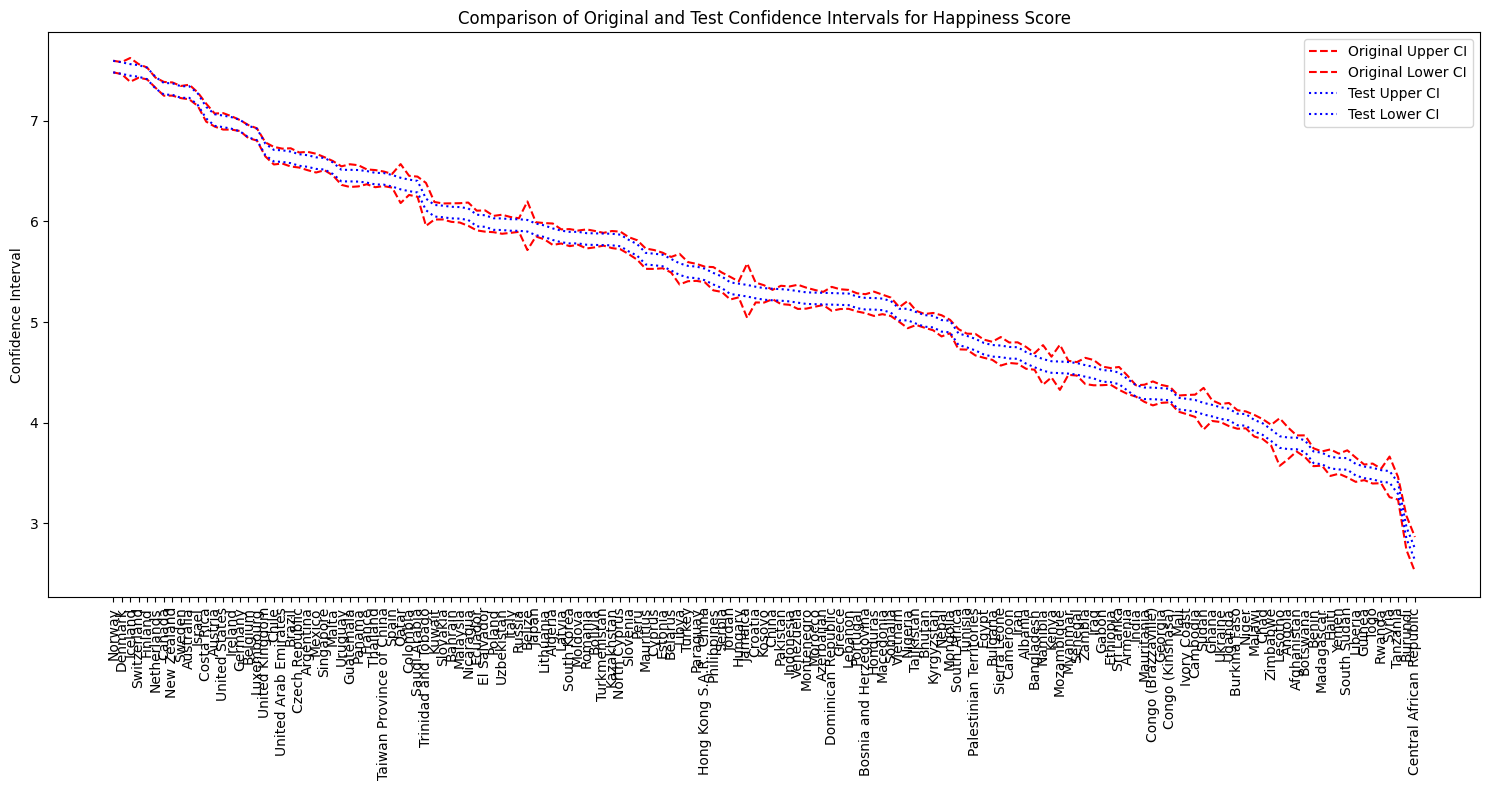

In [131]:
df_test_1.sort_values('Happiness Rank', inplace=True)

plt.figure(figsize=(15, 8))

plt.plot(df_test_1['Country'], df_test_1['Upper Confidence Interval'], label='Original Upper CI', color='red', linestyle='--')
plt.plot(df_test_1['Country'], df_test_1['Lower Confidence Interval'], label='Original Lower CI', color='red', linestyle='--')

plt.plot(df_test_1['Country'], df_test_1['Upper Confidence Interval Test'], label='Test Upper CI', color='blue', linestyle=':')
plt.plot(df_test_1['Country'], df_test_1['Lower Confidence Interval Test'], label='Test Lower CI', color='blue', linestyle=':')

plt.xticks(rotation=90)  
plt.ylabel('Confidence Interval')
plt.title('Comparison of Original and Test Confidence Intervals for Happiness Score')
plt.legend()
plt.tight_layout() 
plt.show()


In [132]:
df_test_2 = pd.read_csv("../data/2016.csv")

std_dev = df_test_2['Happiness Score'].std()
n = 1490
standard_error = std_dev / np.sqrt(n)

z_value = 1.96  
df_test_2['Upper Confidence Interval Test'] = df_test_2['Happiness Score'] + (z_value * standard_error)
df_test_2['Lower Confidence Interval Test'] = df_test_2['Happiness Score'] - (z_value * standard_error)

df_test_2.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Upper Confidence Interval Test,Lower Confidence Interval Test
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,7.58397,7.46803
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,7.56697,7.45103
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,7.55897,7.44303
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,7.55597,7.44003
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,7.47097,7.35503


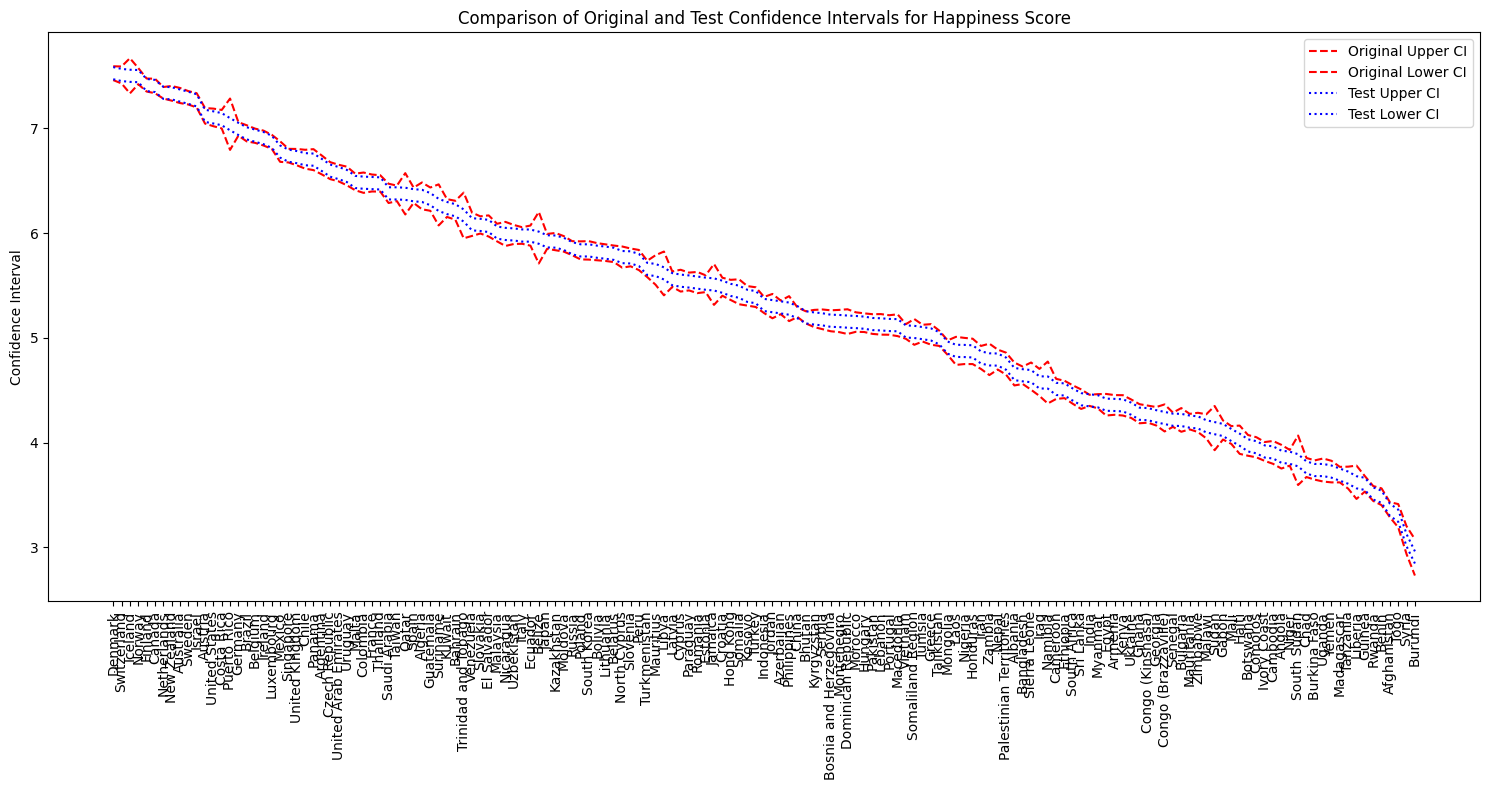

In [133]:
df_test_2.sort_values('Happiness Rank', inplace=True)

plt.figure(figsize=(15, 8))

plt.plot(df_test_2['Country'], df_test_2['Upper Confidence Interval'], label='Original Upper CI', color='red', linestyle='--')
plt.plot(df_test_2['Country'], df_test_2['Lower Confidence Interval'], label='Original Lower CI', color='red', linestyle='--')

plt.plot(df_test_2['Country'], df_test_2['Upper Confidence Interval Test'], label='Test Upper CI', color='blue', linestyle=':')
plt.plot(df_test_2['Country'], df_test_2['Lower Confidence Interval Test'], label='Test Lower CI', color='blue', linestyle=':')

plt.xticks(rotation=90)  
plt.ylabel('Confidence Interval')
plt.title('Comparison of Original and Test Confidence Intervals for Happiness Score')
plt.legend()
plt.tight_layout() 
plt.show()

In [134]:
df_test_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         157 non-null    object 
 1   Region                          157 non-null    object 
 2   Happiness Rank                  157 non-null    int64  
 3   Happiness Score                 157 non-null    float64
 4   Lower Confidence Interval       157 non-null    float64
 5   Upper Confidence Interval       157 non-null    float64
 6   Economy (GDP per Capita)        157 non-null    float64
 7   Family                          157 non-null    float64
 8   Health (Life Expectancy)        157 non-null    float64
 9   Freedom                         157 non-null    float64
 10  Trust (Government Corruption)   157 non-null    float64
 11  Generosity                      157 non-null    float64
 12  Dystopia Residual               157 

In [135]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Happiness Rank                 157 non-null    int64  
 2   Happiness Score                157 non-null    float64
 3   Lower Confidence Interval      157 non-null    float64
 4   Upper Confidence Interval      157 non-null    float64
 5   Economy (GDP per Capita)       157 non-null    float64
 6   Family                         157 non-null    float64
 7   Health (Life Expectancy)       157 non-null    float64
 8   Freedom                        157 non-null    float64
 9   Trust (Government Corruption)  157 non-null    float64
 10  Generosity                     157 non-null    float64
 11  Dystopia Residual              157 non-null    float64
 12  Year                           157 non-null    int

In [136]:
def calculate_confidence_intervals(df):
    std_dev = df['Happiness Score'].std()
    n = 1490
    standard_error = std_dev / np.sqrt(n)
    z_value = 1.96
    
    df['Upper Confidence Interval'] = df['Happiness Score'] + (z_value * standard_error)
    df['Lower Confidence Interval'] = df['Happiness Score'] - (z_value * standard_error)
    
    return df

In [137]:
df_2015 = calculate_confidence_intervals(df_2015)
df_2016 = calculate_confidence_intervals(df_2016)
df_2017 = calculate_confidence_intervals(df_2017)
df_2018 = calculate_confidence_intervals(df_2018)
df_2019 = calculate_confidence_intervals(df_2019)

C:\Users\J_Cam\AppData\Local\Temp\ipykernel_17660\53616795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_half.sort_values('Happiness Rank', inplace=True)


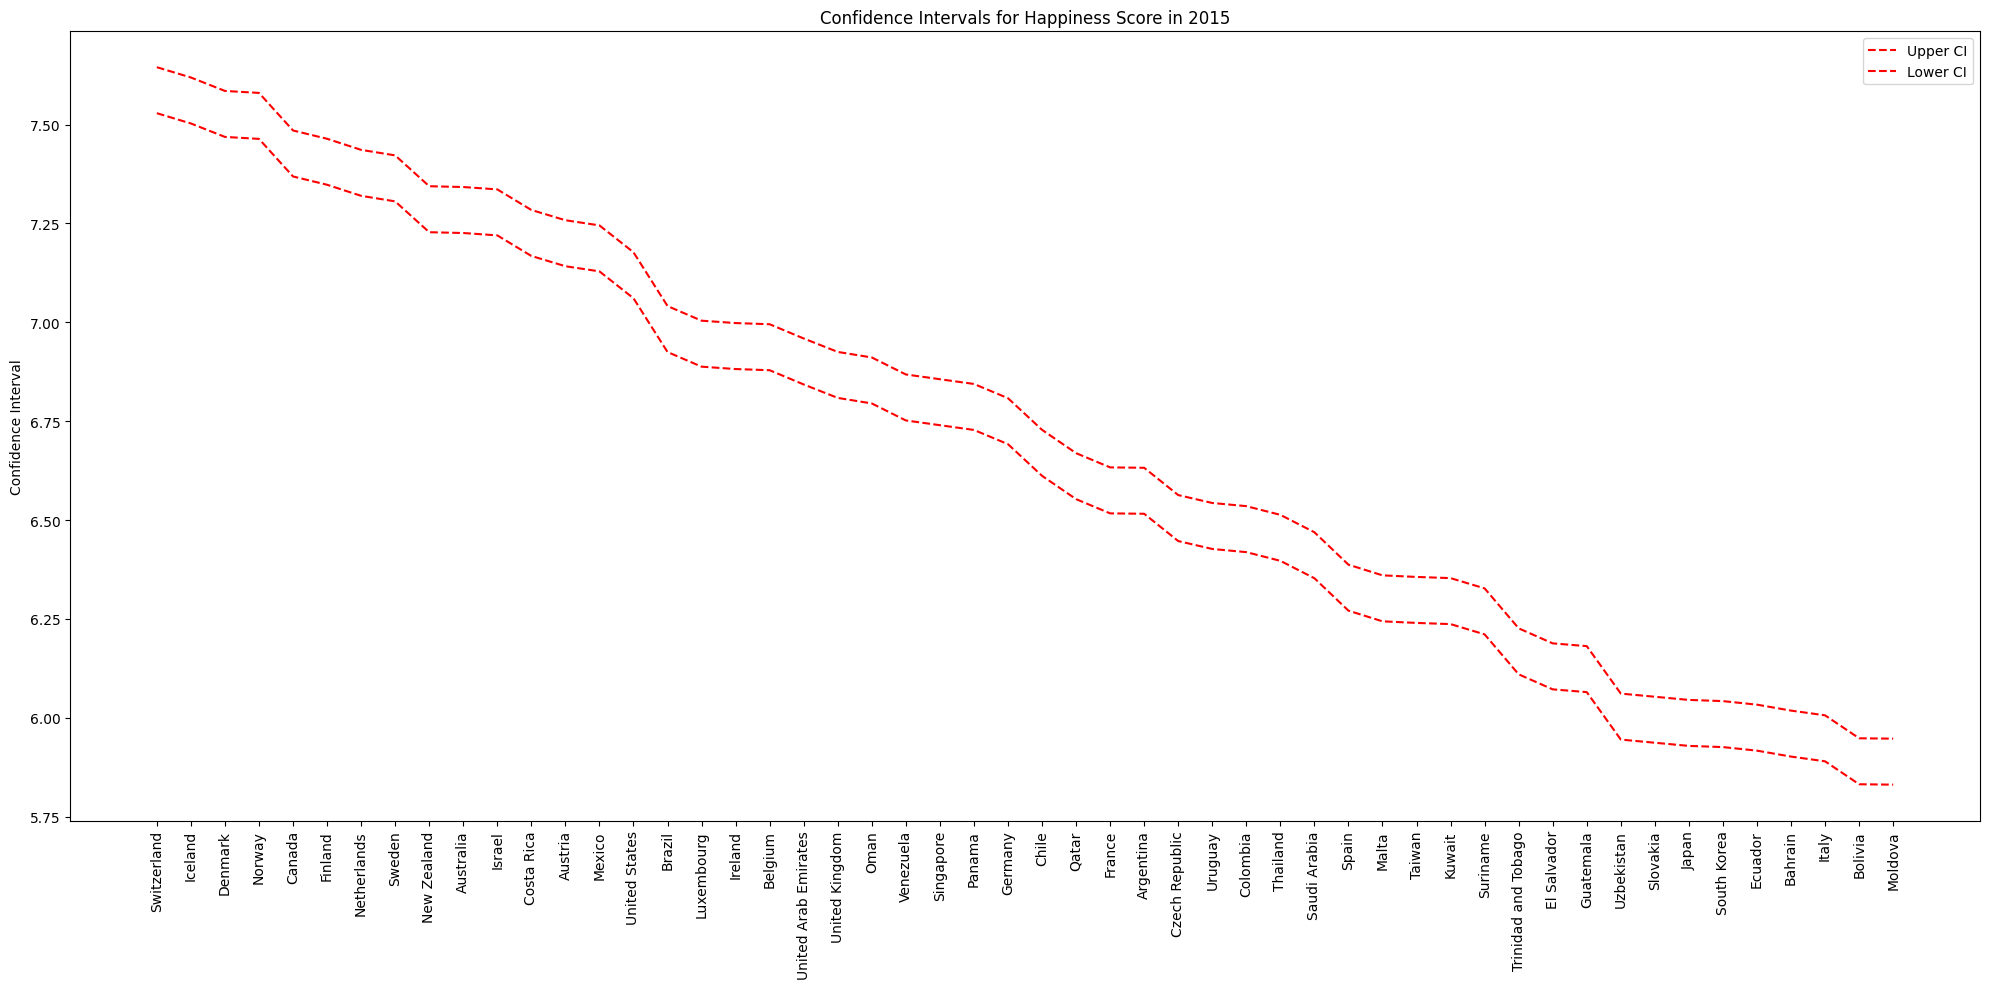

In [138]:
first_half = df_2015.iloc[:len(df_2015)//3]
first_half.sort_values('Happiness Rank', inplace=True)

plt.figure(figsize=(20, 10))

plt.plot(first_half['Country'], first_half['Upper Confidence Interval'], label='Upper CI', color='red', linestyle='--')
plt.plot(first_half['Country'], first_half['Lower Confidence Interval'], label='Lower CI', color='red', linestyle='--')

plt.xticks(rotation=90)  
plt.ylabel('Confidence Interval')
plt.title('Confidence Intervals for Happiness Score in 2015')
plt.legend()
plt.tight_layout() 
plt.show()


This is a sample of the 2015 confidence intervals, this sample is shown to demonstrate what the other years should look like.

In [139]:
df_2015 = df_2015.drop(columns = ["Dystopia Residual", "Standard Error", "Family"], axis = 1)
df_2016 = df_2016.drop(columns = ["Dystopia Residual", "Family"], axis = 1)
df_2017 = df_2017.drop(columns = ["Dystopia Residual", "Family"], axis = 1)
df_2018 = df_2018.drop(columns = ["Social support"], axis = 1)
df_2019 = df_2019.drop(columns = ["Social support"], axis = 1) 

In [140]:
print(f"2015: \n", df_2015.columns.tolist())
print(f"2016: \n", df_2016.columns.tolist())
print(f"2017: \n", df_2017.columns.tolist())
print(f"2018: \n", df_2018.columns.tolist())
print(f"2019: \n", df_2019.columns.tolist())

2015: 
 ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year', 'Upper Confidence Interval', 'Lower Confidence Interval']
2016: 
 ['Country', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']
2017: 
 ['Country', 'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Health (Life Expectancy)', 'Economy (GDP per Capita)', 'Happiness Score', 'Happiness Rank', 'Upper Confidence Interval', 'Lower Confidence Interval', 'Year']
2018: 
 ['Generosity', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Year', 'Country', 'Upper Confidence Interval', 'Lower Confidence Interval']
2019: 
 ['Generosity', 'Happiness Rank', 'Happiness 

Now all the datasets have the same columns and all the columns have the same name, so, now we can concatenate them. Maybe we should order the columns in the same way. That way we won't have problems with concatenation.

In [141]:
standard_order = ['Country', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Year']

df_2015 = df_2015[standard_order]
df_2016 = df_2016[standard_order]
df_2017 = df_2017[standard_order]
df_2018 = df_2018[standard_order]
df_2019 = df_2019[standard_order]

I want to do the concatenation with the same countries in all the datasets, so I will use the countries at 2015 to normalize them and because the 2015 dataset has only countries, no regions in the country column.

In [142]:
countries_2015 = set(df_2015['Country'])

df_2016 = df_2016[df_2016['Country'].isin(countries_2015)]
df_2017 = df_2017[df_2017['Country'].isin(countries_2015)]
df_2018 = df_2018[df_2018['Country'].isin(countries_2015)]
df_2019 = df_2019[df_2019['Country'].isin(countries_2015)]

In [143]:
columns_2015, rows_2015 = df_2015.shape
print(columns_2015, rows_2015)
columns_2016, rows_2016 = df_2016.shape
print(columns_2016, rows_2016)
columns_2017, rows_2017 = df_2017.shape
print(columns_2017, rows_2017)
columns_2018, rows_2018 = df_2018.shape
print(columns_2018, rows_2018)
columns_2019, rows_2019 = df_2019.shape
print(columns_2019, rows_2019)

158 11
151 11
149 11
150 11
149 11


In [144]:
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)
df.head()

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,7.52886,7.64514,1.39651,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,7.50286,7.61914,1.30232,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,7.46886,7.58514,1.32548,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,7.46386,7.58014,1.45900,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,7.36886,7.48514,1.32629,0.90563,0.63297,0.32957,0.45811,2015


In [145]:
columns, rows = df.shape
print(columns, rows)

757 11


In [146]:
df = df.dropna()

In [147]:
df = pd.get_dummies(df, columns=['Year'])

df.head()

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
0,Switzerland,1,7.587,7.52886,7.64514,1.39651,0.94143,0.66557,0.41978,0.29678,True,False,False,False,False
1,Iceland,2,7.561,7.50286,7.61914,1.30232,0.94784,0.62877,0.14145,0.43630,True,False,False,False,False
2,Denmark,3,7.527,7.46886,7.58514,1.32548,0.87464,0.64938,0.48357,0.34139,True,False,False,False,False
3,Norway,4,7.522,7.46386,7.58014,1.45900,0.88521,0.66973,0.36503,0.34699,True,False,False,False,False
4,Canada,5,7.427,7.36886,7.48514,1.32629,0.90563,0.63297,0.32957,0.45811,True,False,False,False,False


# Model training

In [148]:
y = df['Happiness Score']
X = df.drop(columns= ['Happiness Score', 'Happiness Rank','Lower Confidence Interval', 'Upper Confidence Interval', 'Country'], axis=1)

In [149]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=42)),
    ('XGBoost Regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
]
    

def modelPipeline(X_train, X_test, y_train, y_test):
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
        ]
    )
    pipelines = []
    scores_data = pd.DataFrame(columns=['Model', 'MSE', 'R2'])

    for reg_name, reg in models:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', reg)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        scores_data.loc[len(scores_data)] = {
            'Model': reg_name,
            'MSE': mse,
            'R2': r2
        }
        pipelines.append(pipeline)

    return pipelines, scores_data

In [150]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

pipelines, results = modelPipeline(X_train, X_test, y_train, y_test)
print(results)

                     Model       MSE        R2
0        Linear Regression  0.344928  0.729897
1  Decision Tree Regressor  0.500354  0.608188
2  Random Forest Regressor  0.283366  0.778104
3        XGBoost Regressor  0.319173  0.750065


In [151]:
best_model_index = results['R2'].idxmax()
best_model_pipeline = pipelines[best_model_index]

model_directory = '../models/'
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

model_path = os.path.join(model_directory, 'random_forest_r.pkl')
dump(best_model_pipeline, model_path)

print(f"Best model saved to {model_path}")

Best model saved to ../models/random_forest_r.pkl


In [152]:
df['Test'] = np.nan  

X_full = df.drop(columns=['Happiness Score', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Country'], axis=1)
df['Test'] = best_model_pipeline.predict(X_full)

df.head()

,Country,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Test
0,Switzerland,1,7.587,7.52886,7.64514,1.39651,0.94143,0.66557,0.41978,0.29678,True,False,False,False,False,7.53349
1,Iceland,2,7.561,7.50286,7.61914,1.30232,0.94784,0.62877,0.14145,0.43630,True,False,False,False,False,7.33604
2,Denmark,3,7.527,7.46886,7.58514,1.32548,0.87464,0.64938,0.48357,0.34139,True,False,False,False,False,7.26666
3,Norway,4,7.522,7.46386,7.58014,1.45900,0.88521,0.66973,0.36503,0.34699,True,False,False,False,False,7.47665
4,Canada,5,7.427,7.36886,7.48514,1.32629,0.90563,0.63297,0.32957,0.45811,True,False,False,False,False,7.33987
